# Stim Surface Code Demo (thin notebook)

Notebook 只做 **参数设置 + 输出展示**，所有函数在 `surface_code/` 包中。

In [1]:
import os, sys
ROOT = os.path.abspath(os.path.join(os.getcwd(), '..')) if os.path.basename(os.getcwd()) == 'notebooks' else os.path.abspath(os.getcwd())
if ROOT not in sys.path:
    sys.path.insert(0, ROOT)
print('ROOT:', ROOT)


ROOT: c:\iCloud\iCloudDrive\苏州\Codes\qec_sim


In [2]:
from surface_code import (
    SurfaceCodeParams,
    build_surface_code_circuit,
    circuit_ascii_diagram,
    detector_matchgraph,
    estimate_logical_error_rate_mwpm,
    demo_single_error_event_on_matchgraph,
    explain_shot_on_matchgraph,
    demo_syndrome_on_matchgraph,
    draw_chip_topology, 
)


## 1) 参数设置与电路生成

In [3]:
params = SurfaceCodeParams(d=5, rounds=5, p=1e-2, basis='Z')
c = build_surface_code_circuit(params)
print('num_qubits:', c.num_qubits)
print('num_detectors:', c.num_detectors)
print('num_observables:', c.num_observables)


num_qubits: 64
num_detectors: 120
num_observables: 1


## 2) ASCII 电路图（检查 TICK 调度）

      /----------------------------------------------\ /-----------------\ /-----------------\ /-------------------------------------------------------------------------------------------------------------------------------------\ /-------------------------------------------------------------------------------------------------\ /---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\ /-----------------\ /-----------------------------------------------------------------\ /REP 4   /-----------------\ /-----------------\ /-------------------------------------------------------------------------------------------------------------------------------------\ /-------------------------------------------------------------------------------------------------\ /-------------------------------------------------------------------------------------------------------------------

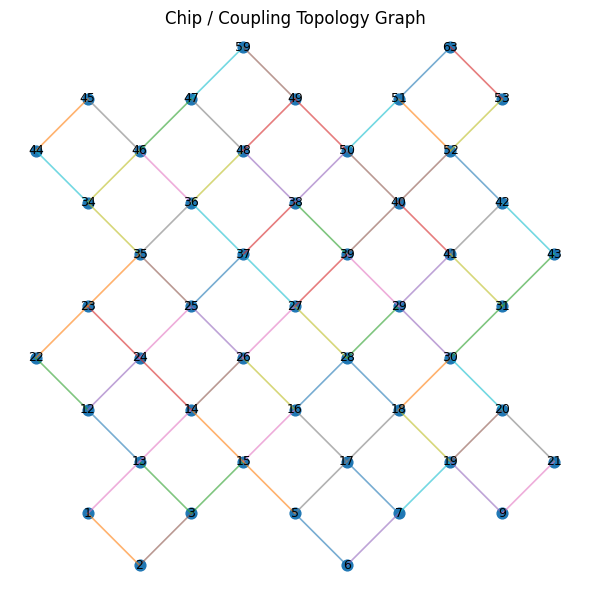

In [4]:
draw_chip_topology(c)
print(circuit_ascii_diagram(c))


## 3) Stim 自带 matchgraph 可视化（SVG/3D）

- `svg-html`：最适合 notebook 直接看
- `3d`：导出 glTF 文本（建议用外部 glTF viewer 打开）
- `3d-html`：依赖外部 JS CDN，部分环境会被禁用

In [5]:
# svg matchgraph
svg = detector_matchgraph(c, decompose=True, kind='svg')
with open(f"matchgraph_d={params.d}_rounds={params.rounds}_p={params.p}.svg", "w") as f:
    print(svg, file=f)

In [6]:
# 3d matchgraph
gltf = detector_matchgraph(c, kind="3d")
with open(f"matchgraph_d={params.d}_rounds={params.rounds}_p={params.p}.gltf", "w") as f:
    print(gltf, file=f)

## 4) 逻辑错误率估计（MWPM + PyMatching）

In [7]:
rates = estimate_logical_error_rate_mwpm(c, shots=2000, seed=123)
print('logical error rate per observable:', rates)

logical error rate per observable: [0.038]


## 5) 单个 error-event 注入演示（可旋转）

In [8]:
demo_single_error_event_on_matchgraph(c, seed=2)

{'injected_edge': {'u': 12, 'v': 15, 'p': 0.001338700097173321, 'obs_mask': 0},
 'fired_detectors': [12, 15],
 'pairs': [(15, 12)]}

## 6) 多个 error-event 注入演示

In [12]:
demo_syndrome_on_matchgraph(c, seed=123, shots=20, shot=0)

num fired = 10 num mwpm pairs = 7 num highlight edges = 3
edges: green= 3 red(logical)= 0
pairs used: 7 skip_missing: 0 skip_nopath: 0


{'fired': [6, 13, 15, 16, 20, 64, 66, 90, 99, 110],
 'pairs': array([[  6,  16],
        [ 13,  -1],
        [ 15,  20],
        [ 64,  -1],
        [ 66,  90],
        [ 99,  -1],
        [110,  -1]], dtype=int64)}